[<img align="left" width="140px" src="https://storage.googleapis.com/static.drivetrainhub.com/img/dh_logo_text_217x80.png"/>](https://drivetrainhub.com)

<div align="right">© 2020 Drivetrain Hub LLC</div>

# Geometry / Helical Gears
---

**Authors**:  [Chad Glinsky](https://www.linkedin.com/in/chad-glinsky-a1840b13/)

**Description**:  Review of geometry for helical gears and helical gear meshes.

## Table of Contents

1. [Introduction](#Introduction)
    1. [Helix](#Helix)
1. [Gear Teeth](#Gear-Teeth)
    1. [Nomenclature](#Nomenclature-1)
    1. [Basic Parameters](#Basic-Parameters)
    1. [Tooth Thickness](#Tooth-Thickness)
    1. [Tooth Flank](#Tooth-Flank)
    1. [Root Fillet](#Root-Fillet)
    1. [Internal](#Internal)
    1. [Example](#Example-Gear)
1. [Gear Mesh](#Gear-Mesh)
    1. [Nomenclature](#Nomenclature-2)
    1. [Compatibility](#Compatibility)
    1. [Pressure Angle](#Pressure-Angle)
    1. [Center Distance](#Center-Distance)
    1. [Clearances](#Clearances)
    1. [Plane of Action](#Plane-of-Action)
    1. [Contact](#Contact)
    1. [Kinematics](#Kinematics)
    1. [Example](#Example-Mesh)
1. [Gear Design](#Gear-Design)
    1. [Transverse Plane](#Transverse-Plane)
    1. [Axial Dimension](#Axial-Dimension)
    1. [Example](#Example-Design)
1. [References](#References)

#### Notebook imports and settings

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi, radians, degrees, isclose, ceil, floor, cos, tan
import numpy as np
import pandas as pd
import qgrid
from IPython.display import display, HTML

# notebook modules
import helical_gears as hg

# settings
FIGSIZE = (6, 6)  # size of plots
plt.rcParams.update({'font.size': 12})  # set default font size

# usage mode
DEV_MODE = True

In [20]:
# DEVELOPMENT USE: %autoreload 1
# PRODUCTION USE: %autoreload 0
%load_ext autoreload
%autoreload 1 if DEV MODE else %autoreload 0
%aimport helical_gears

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$\LaTeX$ commands
$\newcommand{\inv}{\text{inv }}$
$\newcommand{\mm}{\text{mm}}$
$\newcommand{\deg}{^\circ}$
$\newcommand{\degt}{\text{deg}}$
$\newcommand{\perinch}{\text{in}^{-1}}$
$\newcommand{\mps}{\text{m/s}}$
$\newcommand{\rpm}{\text{rpm}}$

## Introduction

The geometry of helical gears and gear meshes is reviewed here.  Helical gears have similarities with spur gears, but fundamental differences do exist. Helical and spur gears similarities include:

- Mechanical power is transferred between rotating parallel bodies
- Gear tooth geometry uses the involute curve to transmit motion
- Plane of action is along the path tangent to the involute base circles

The visualization of helical gears clearly shows the key geometric difference between it and a spur gear.

<img src="./img/drivetrainhub_helical_gearset_15-28.png" alt="External helical gear pair" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Helical gear pair modeled in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

A helical gear is *similar* to a spur gear with an applied twist along its axial axis.  Conceptually, this description is sufficient, but the mathematics of helical gear geometry must be considered in more detail to accurately define it.  This notebook will review the geometric attributes and their significance to the operation of helical gear pairs.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>The geometry of a helical gear is directly dependent on the manufacturing tooling and processes used to make the gear.</b>
    <br><br>
    To understand the tooling and manufacturing processes used to make a helical gear, see the notebooks on gear tooling.  This notebook focuses on the resulting geometry of manufactured gears and gear pairs, not on how they are made.
</div>

### Helix

To define the geometry of a helical gear tooth, we shall first define the *helix*.  A helix is a shape commonly associated with components such as coil springs, bolt threads, and gear hobs.  A helix contains certain characteristics that make it well suited for many applications, including the manufacturing and operation of mechanical gears.

<img src="./img/wikipedia_helix.svg" alt="Helix curve" style="max-height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Helix curve (right-handed)</p>
<span style="font-size: 8pt; float: right">Image credit: <a href="//commons.wikimedia.org/wiki/User:RobHar" title="User:RobHar">RobHar</a></span><br>

For helical gears, a reference helix is defined by a *helix angle*, $\beta$, at the theoretical pitch diameter.  The sign of the helix angle determines the hand of the helix, with positive (+) being right-hand.  The diagram below illustrates the helix angle, not to be confused with the helix lead angle.

<img src="./img/drivetrainhub_helix_angle.svg" alt="Helix curve" style="max-height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Helix angle of gear tooth</p>

If we imagine unwrapping the helix curve along its helix angle, we can derive an expression for the helix pitch length as a function of helix angle and theoretical pitch diameter:

$$p_\beta = \frac{\pi d}{\tan\beta}$$

and by acknowledging the helix pitch length as a constant regardless of diameter, the helix angle at an arbitrary diameter, $d_y$, is:

$$\beta_y = \tan^{-1}\left(\frac{d_y \tan\beta}{d}\right)$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>For the geometry of a helical gear, the helix angle varies as a function of radius.</b>  
    <br><br>
    This is observed in a helical gear tooth since the involute profile spans over a range of diameters.  This results in the helix angle at the base diameter being less than at the tip diameter.  This is particularly important when considering contact on the tooth surface and the resulting forces of a helical gear pair.
</div>

A helix curve can be expressed in Cartesian coordinates with a set of parametric equations:

$$x(t) = r \cos t$$
$$y(t) = r \sin t$$
$$z(t) = c t$$

where the helix pitch, i.e. the $z$ distance of one helix loop, equals $2 \pi c$.

$r$,$\beta$,$b$,$p_\beta$
1,30,20,10.88


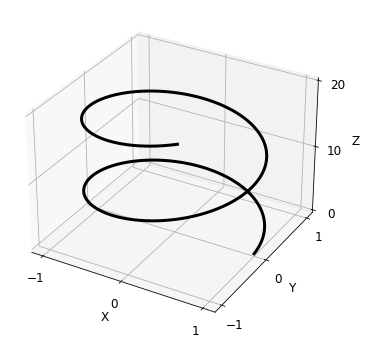

In [21]:
# INPUTS
# ------
radius = 1
helix_angle_deg = 30
length = 20

# calculated properties
helix_angle = radians(helix_angle_deg)
pitch = round(hg.helix_pitch_fcn(radius, helix_angle), 2)

# display input variables
cols = ['$r$', '$\\beta$', '$b$', '$p_\\beta$']
data = [[radius, helix_angle_deg, length, pitch]]
df = pd.DataFrame(data=data, columns=cols)
display(HTML(df.to_html(index=False)))

# helix coordinates
x, y, z = hg.helix_curve(radius, helix_angle, length)

# create figure and axes
fig = plt.figure(figsize=FIGSIZE)
ax = fig.add_subplot(111, projection='3d')

# plot helix
ax.plot(x, y, z, 'k', linewidth=3)

# format plot
xy_ticks = np.linspace(-radius, radius, 3)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xticks(xy_ticks)
ax.set_yticks(xy_ticks)
ax.set_zticks(np.linspace(0, length, 3))
plt.show()

## Gear Teeth

This section reviews the geometric properties of helical gear teeth. A working example is provided at the end of the section.

To understand the geometry of a helical gear, it is appropriate to consider both the *transverse* and *normal* planes.  These distinct planes exist due to the helical shape of the gear teeth.  In the case of spur gears, these planes are coincident since $\beta = 0\deg$.

- **Transverse plane**: Plane normal to the axis of rotation, i.e. it is the plane of gear rotation.
- **Normal plane**: Plane normal to the gear tooth surface, oriented by the helix angle relative to the transverse plane. 

<img src="./img/drivetrainhub_normal_and_transverse_planes.svg" alt="Transverse and normal planes" style="max-height: 250px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Transverse and normal planes</p>

Lengths in the transverse and normal planes are related by helix angle according to:

$$\cos\beta = \frac{\text{normal length}}{\text{transverse length}}$$

### Nomenclature <a name="Nomenclature-1"></a>

This table provides a set of input parameters commonly used to define the geometry of helical gear teeth.

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$m_n$</td>
        <td style="text-align:left">Normal module</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_n$</td>
        <td style="text-align:left">Normal pressure angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$z$</td>
        <td style="text-align:left">Number of teeth</td>
    </tr>
    <tr>
        <td style="text-align:left">$\beta$</td>
        <td style="text-align:left">Helix angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$b$</td>
        <td style="text-align:left">Facewidth</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_a$</td>
        <td style="text-align:left">Tip diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_f$</td>
        <td style="text-align:left">Root diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$s_n$</td>
        <td style="text-align:left">Normal tooth thickness</td>
    </tr>
    <tr>
        <td style="text-align:left">$\rho_f$</td>
        <td style="text-align:left">Tool tip radius</td>
    </tr>
</table>

It is also common to use addendum, dedendum, and profile shift coefficients of the basic rack or cutting tool instead of tip diameter, root diameter, and tooth thickness.  The former are better associated with the manufacturing process, while the latter are in reference to the manufactured geometry of a helical gear.

Notice tool tip radius is included in this set of input parameters.  It may seem out of place, but it is necessary to define since it relates directly to the manufacturing tooling responsible for the helical gear root geometry.  To understand this further, refer to the notebooks on gear tooling.

The next table provides a set of parameters commonly calculated for the geometry of helical gear teeth. Notice that both normal and transverse components exist for many parameters.  Certain parameters inherently exist only in the transverse plane, such as diameters and roll angles.

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$m_t$</td>
        <td style="text-align:left">Transverse module</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_t$</td>
        <td style="text-align:left">Transverse pressure angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$d$</td>
        <td style="text-align:left">Theoretical pitch diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_b$</td>
        <td style="text-align:left">Base diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_F$</td>
        <td style="text-align:left">Root fillet boundary diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$\beta_b$</td>
        <td style="text-align:left">Base helix angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_\beta$</td>
        <td style="text-align:left">Helix pitch length</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{bn}$</td>
        <td style="text-align:left">Normal base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{bt}$</td>
        <td style="text-align:left">Transverse base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_a$</td>
        <td style="text-align:left">Axial pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$P_n$</td>
        <td style="text-align:left">Normal diametral pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$P_t$</td>
        <td style="text-align:left">Transverse diametral pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$x$</td>
        <td style="text-align:left">Profile shift</td>
    </tr>
    <tr>
        <td style="text-align:left">$s_n$</td>
        <td style="text-align:left">Normal tooth thickness</td>
    </tr>
    <tr>
        <td style="text-align:left">$s_t$</td>
        <td style="text-align:left">Transverse tooth thickness</td>
    </tr>
    <tr>
        <td style="text-align:left">$s_{na}$</td>
        <td style="text-align:left">Normal tooth tip thickness</td>
    </tr>
    <tr>
        <td style="text-align:left">$s_{ta}$</td>
        <td style="text-align:left">Transverse tooth tip thickness</td>
    </tr>
    <tr>
        <td style="text-align:left">$\psi$</td>
        <td style="text-align:left">Tooth thickness half angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$\theta$</td>
        <td style="text-align:left">Roll angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$h_a$</td>
        <td style="text-align:left">Basic rack addendum or tool dedendum</td>
    </tr>
    <tr>
        <td style="text-align:left">$h_f$</td>
        <td style="text-align:left">Basic rack dedendum or tool addendum</td>
    </tr>
    <tr>
        <td style="text-align:left">$\rho_f$</td>
        <td style="text-align:left">Basic rack root radius or tool tip radius</td>
    </tr>
</table>

Notice the inverse relationship used for a basic rack and rack cutting tool, such as a hob.  Any symbols combined with a superscript asterisk refer to a *coefficient*, a term normalized by the module.  For example, $x^*$ is the profile shift coefficient.

### Basic Parameters

The basic parameters defining the geometry of helical gear teeth are normal module, normal pressure angle, number of teeth, and helix angle.  Symbolically, each is denoted as $m_n$, $\alpha_n$, $z$, and $\beta$, respectively.  Different basic parameters could be used, but these are the most common.

#### Module

Module is a defining parameter of gear tooth size, with units of $\rm{mm}$.  Module values exist in both the normal and transerve planes.  Geometrically, it is easiest to understand the transverse module, expressed as millimeters of theoretical pitch diameter per tooth:

$$m_t = \frac{d}{z}$$

As a function of basic parameters, the transverse module is calculated as:

$$m_t = \frac{m_n}{\cos\beta}$$

By examining a transverse section of a helical gear, we can derive the transverse pitch and its relationship to module.

<img src="./img/drivetrainhub_transverse_pitch.svg" alt="Transverse pitch and theoretical pitch diameter" style="max-height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Transverse pitch and theoretical pitch diameter</p>

where the transverse pitch equals:

$$p_t = \frac{\pi d}{z} = \pi m_t$$

Diametral pitch, $P_d$, is the module equivalent parameter used with the system of imperial units, with units of $\rm{in}^{-1}$:

$$P_d = \frac{25.4}{m}$$

#### Pressure Angle <a name="Basic-Parameters_Pressure-Angle"></a>

Since helical gears are a form of cylindrical involute gears, the pressure angle at the theoretical pitch diameter is used as a defining parameter.  Geometrically, it is easiest to understand the transverse pressure angle as illustrated below.

<img src="./img/drivetrainhub_involute_pressure_angle.svg" alt="Involute pressure angle" style="width: 100%; max-width: 350px"/>
<p style="text-align: center; font-weight: bold;">Involute curve pressure angle in transverse plane</p>

The transverse pressure angle can be calculated as a function of the normal pressure angle and helix angle:

$$\alpha_t = \tan^{-1}\left(\frac{\tan\alpha_n}{\cos\beta}\right)$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The pressure angles explained here are sometimes called <i>reference</i> values, since they refer to the pressure angles associated with the theoretical pitch diameter.  Recall, involute pressure angle changes as a function of diameter.  In a later section, the <i>working</i> pressure angle of a gear pair is explained.
</div>

From the previous figure, a useful equation for transverse pressure angle at an arbitrary diameter, $d_y$, is derived as:

$$\cos\alpha_{ty} = \frac{d_b}{d_y}$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    TODO guidelines on selecting pressure angles
</div>

### Tooth Thickness

Tooth thickness of a helical gear is defined in the transverse and normal planes.  Transverse tooth thickness is defined as the arc length of tooth material at the theoretical pitch diameter.  Tooth thickness is important to tooth bending strength and is primarily a function of the gear module and profile shift.  For more about profile shift, see the blue info box below.

<img src="./img/drivetrainhub_tooth_thickness.svg" alt="Transverse tooth thickness diagram" style="width: 100%; max-width: 450px"/>
<p style="text-align: center; font-weight: bold;">Transverse tooth thickness diagram</p>

Tooth thickness and profile shift are related by this expression:

$$s_t = \frac{m_n}{\cos\beta} \left(\frac{\pi}{2} + 2 x^* \tan\alpha_n\right)$$

From the diagram, it is easy to see that transverse tooth thickness at an arbitrary diameter, $d_y$, is:

$$s_{ty} = d_y \psi_y$$

where the corresponding tooth thickness half angle, $\psi_y$, is observed as:

$$\psi_y = \psi + \text{inv }{\alpha_t} - \text{inv }{\alpha_{ty}}$$

and since $s_t$ is known and $\psi = s_t / d$, a usable expression is obtained by substitution of the equations above:

$$s_{ty} = d_y \left(\frac{\pi}{2 z} + \frac{2 x^* \tan\alpha_n}{z} + \text{inv }\alpha_t - \text{inv }\alpha_{ty} \right)$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Profile shift is in reference to common manufacturing processes used to make helical gears</b>.  
    <br><br>
    Physically, profile shift refers to the distance between a gear's theoretical pitch diameter and the cutting tool datum line.  Without consideration for the manufacturing process, it is difficult to assign physical meaning to profile shift, in which case considering the gear tooth thickness directly is more intuitive.
</div>

#### Tooth tip thickness

The tooth tip thickness is of particular interest since it can fracture if too thin.  Gear designers that are maximizing contact ratio will need to apply a constraint for minimum allowable tooth tip thickness.  Without constraining it, the tooth tip thickness will trend towards zero, a condition known as *tooth peaking*.

$$s_{na} = s_{ta} \cos\beta_a$$

<div class="alert alert-block alert-danger" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>The recommended minimum value for the normal tooth tip thickness ranges from $0.25 m_n$ to $0.4 m_n$.</b>
    <br><br>
    The true physical limit of tooth tip thickness is dependent on several parameters of a gear mesh pertaining to the tooth strength and tooth tip loads.
</div>

### Tooth Flank

The helical gear tooth flank is a 3-dimensional surface that can be defined numerically by computing an involute curve for each transverse section along the gear facewidth.  Each successive involute is the same as the previous, but with a rotational transform applied to account for the helix hand and angle.

<img src="./img/drivetrainhub_helical_tooth_flank.png" alt="Helical gear tooth flank" style="width: 100%; max-width: 300px"/>
<p style="text-align: center; font-weight: bold;">Helical gear tooth flank</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>The involute profile of a helical gear tooth is in the transverse plane</b>.  
    <br><br>
    This is an important and intentional result of the manufacturing process when cutting helical gears since the transverse plane is the plane of rotation.  Without this result, a pair of meshing helical gears would not possess the benefits associated with cylindrical involute gearing, such as conjugate action.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Microgeometry modifications are commonly applied to the tooth flanks of helical gears with medium-to-high quality.</b>
    <br><br>
    Different methods exist for applying these flank surface modifications, such as gear grinding, but it is outside the scope of this notebook to review them.
</div>

### Root Fillet

The root fillet is an important, but complex, feature of any cylindrical involute gear.  The gear tooth bending strength is highly dependent on the root geometry.  

<img src="./img/drivetrainhub_root_fillet.svg" alt="Root fillet and boundary point" style="width: 100%; max-width: 230px"/>
<p style="text-align: center; font-weight: bold;">Root fillet and boundary point</p>

The root fillet is not a simple curve that can be described by a set of parametric equations. The reason for its complexity is because it depends on the manufacturing tool geometry and cutting process.  To learn more about this, refer to our notebooks on gear tooling.

#### Form Diameter

The form diameter refers to the diameter at the boundary point, $\rm{F}$, of the involute and root profiles.  In the simplest case, the form diameter boundary point is the point of tangency between the involute and root profiles.  For a rack generation cutting tool, such as a hob, the tool cut point at boundary point $\rm{F}$ is the tool tip point tangent to the rack profile.  For a better understanding, refer to the notebooks on gear tooling.

From a diagram of a rack tool generating the root fillet, an expression for transverse pressure angle at the boundary point can be derived as:
$\newcommand{\toolheight}{h_f - \rho_f + \rho_f \sin\alpha_n - x}$

$$\tan\alpha_{tF} = \tan\alpha_t - \frac{\toolheight}{r_b \sin\alpha_t}$$

which can be used to calculate form diameter.  This equation is invalid if the gear tooth root is undercut. 

#### Undercut

Undercut of a helical gear tooth root is a consequence of the cutting tool removing a portion of the involute profile instead of being tangent to the involute.  The path of the cutting tool tip in plane rolling action with the gear is what generates the undercut root shape.

<img src="./img/drivetrainhub_root_fillet_undercut.svg" alt="Undercut root fillet and boundary point" style="width: 100%; max-width: 200px"/>
<p style="text-align: center; font-weight: bold;">Undercut root fillet and boundary point</p>

Undercut can be related back to certain geometric properties of the gear.  Undercut caused by a rack generation cutting process can be avoided with positive profile shift, thus the following condition is formulated to avoid undercut:

$$x \geq h_a^* - \frac{z \sin^2\alpha_t}{2 \cos\beta}$$

Similarly, a condition for minimum number of teeth to avoid undercut is:

$$z \geq \frac{2 \cos\beta}{\sin^2\alpha_t}\left(h_a^* - x^*\right)$$

More complicated cases of undercut are possible with protuberance cutting tools, but are outside the scope of this notebook.  To learn more about the influence of protuberance, see the notebooks on gear tooling.

<div class="alert alert-block alert-danger" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Gear designers should avoid undercut of <i>finished</i> teeth since it reduces tooth bending strength.</b>
    <br><br>
    Depending on the application requirements, it may not always be possible to avoid undercut, e.g. if a large single-stage gear ratio is required.  In such cases, other failure modes, such as gear scuffing, may become a greater concern due to high pitch line velocities.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Undercut is intentionally added to the <i>pre-finished</i> teeth of many medium-to-high quality gears that undergo a finishing process.</b>
    <br><br>
    A <i>protuberance</i> cutting tool can be used to add undercut to gears that would otherwise not have it.  Pre-finished undercut is beneficial to the finishing process because it provides <i>finishing stock</i> material to be removed and provides an exit path for the finishing tool without interfering with the root.  Upon removal of the finishing stock, the finished involute profile is tangent to the root fillet.
</div>

### Internal

Thus far, we have focused on helical gears of the *external* type, meaning the gear teeth are external to the gear blank (body).  In certain gear trains or applications, helical gears of the *internal* type may be required or better suited.  Below illustrates an internal helical gear with 70 teeth meshing with an external helical gear of 20 teeth, both having a right-hand helix.

<img src="./img/drivetrainhub_helical_gearset_internal_20-70.png" alt="Internal helical gear pair" style="max-height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Internal helical gear mesh in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

Despite visual and operational differences, external and internal helical gears are geometrically similar in the use of involute tooth profiles.  This is important to theoretically achieving conjugate action when an internal gear meshes with an external gear.

Key differences of internal gears:
- Root diameter is greater than tip diameter
- Rack generation manufacturing methods cannot be used
- Unintended undercut is not a concern

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    Internal gears are most commonly used in <b>planetary gear systems</b>, where they are typically referred to as <b>ring gears</b>.  It is also possible to use them in simpler gear trains, such as a slewing gear.
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Helical Gear Geometry<a name="Example-Gear"></a></h3>
    <h4>GIVEN</h4>Input parameters to define a helical gear.
    <h4>FIND</h4>Detailed geometric parameters of the helical gear teeth.
    <h4>SOLUTION</h4>See below.
</div>

In [22]:
# GIVEN
# -----
module_normal = 1
pressure_angle_normal_deg = 20
helix_angle_deg = 15
number_of_teeth = 17
basic_rack_addendum_coefficient = 1
basic_rack_dedendum_coefficient = 1.25
tool_tip_radius_coefficient = 0.38
profile_shift_coefficient = 0.2
facewidth = 10

# SOLUTION
# --------
# conversions
pressure_angle_normal = radians(pressure_angle_normal_deg)
helix_angle = radians(helix_angle_deg)
basic_rack_addendum = basic_rack_addendum_coefficient * module_normal
basic_rack_dedendum = basic_rack_dedendum_coefficient * module_normal
profile_shift = profile_shift_coefficient * module_normal

# core params
module_transverse = hg.module_transverse_fcn(module_normal, helix_angle)
pressure_angle_transverse = hg.pressure_angle_transverse_fcn(pressure_angle_normal, helix_angle)
theoretical_pitch_diameter = hg.theoretical_pitch_diameter_fcn(module_transverse, number_of_teeth)
base_diameter = hg.base_diameter_fcn(theoretical_pitch_diameter, pressure_angle_transverse)
tip_diameter = hg.tip_diameter_fcn(theoretical_pitch_diameter, basic_rack_addendum, profile_shift)
root_diameter = hg.root_diameter_fcn(theoretical_pitch_diameter, basic_rack_dedendum, profile_shift)

# helix and pitches
helix_angle_base = hg.helix_angle_arbitrary_fcn(base_diameter, helix_angle, theoretical_pitch_diameter)
helix_pitch = hg.helix_pitch_fcn(theoretical_pitch_diameter / 2, helix_angle)
pitch_transverse = hg.pitch_transverse_fcn(theoretical_pitch_diameter, number_of_teeth)
pitch_normal = hg.pitch_normal_fcn(module_normal)
base_pitch_transverse = hg.pitch_transverse_fcn(base_diameter, number_of_teeth)
base_pitch_normal = hg.base_pitch_normal_fcn(pitch_normal, pressure_angle_normal)
diametral_pitch_transverse = hg.diametral_pitch_fcn(module_transverse)
diametral_pitch_normal = hg.diametral_pitch_fcn(module_normal)

# tooth thicknesses
tooth_thickness_transverse = hg.tooth_thickness_transverse_fcn(module_normal, pressure_angle_normal, helix_angle, profile_shift_coefficient)
tooth_thickness_transverse_tip = hg.tooth_thickness_transverse_arbitrary_fcn(tip_diameter, module_normal, pressure_angle_normal, number_of_teeth, helix_angle, profile_shift_coefficient)

tooth_thickness_normal = hg.tooth_thickness_normal_fcn(tooth_thickness_transverse, helix_angle)
tooth_thickness_normal_tip = hg.tooth_thickness_normal_fcn(tooth_thickness_transverse_tip, helix_angle)
tooth_thickness_tip_coefficient = tooth_thickness_normal_tip / module_normal

# tooth thickness half angles
tooth_thickness_half_angle = hg.tooth_thickness_half_angle_fcn(theoretical_pitch_diameter, tooth_thickness_transverse)
tooth_thickness_half_angle_tip = hg.tooth_thickness_half_angle_fcn(tip_diameter, tooth_thickness_transverse_tip)

# root params
cutter_addendum_coefficient = basic_rack_dedendum_coefficient
form_diameter = hg.form_diameter_fcn(module_normal, pressure_angle_normal, helix_angle, number_of_teeth, cutter_addendum_coefficient, profile_shift_coefficient, tool_tip_radius_coefficient)
x_min = hg.minimum_profile_shift_coefficient_to_avoid_undercut(basic_rack_addendum_coefficient, pressure_angle_normal, number_of_teeth, helix_angle)
z_min = hg.minimum_teeth_to_avoid_undercut(basic_rack_addendum_coefficient, pressure_angle_normal, profile_shift_coefficient, helix_angle)

# CHECK OUTPUTS
# -------------
if form_diameter is None:
    print("\x1b[31mWARNING: Root fillet undercut is detected.\x1b[0m")  # red color formatting
    
if tooth_thickness_tip_coefficient < 0.25:
    print("\x1b[31mWARNING: Tooth tip thickness is lower than recommended.\x1b[0m")  # red color formatting

# DISPLAY RESULTS
# ---------------
cols = ['Description', 'Symbol', 'Value', 'Units']
data = [
    # INPUTS
    ['Normal module', '$m_n$', module_normal, '$\mm$'],
    ['Normal pressure angle', '$\\alpha_n$', pressure_angle_normal_deg, '$\degt$'],
    ['Helix angle', '$\\beta$', helix_angle_deg, '$\degt$'],
    ['Number of teeth', '$z$', number_of_teeth, '-'],
    ['Addendum coefficient', '$h_a^*$', basic_rack_addendum_coefficient, '-'],
    ['Dedendum coefficient', '$h_f^*$', basic_rack_dedendum_coefficient, '-'],
    ['Tool tip radius coefficient', '$\\rho_f^*$', tool_tip_radius_coefficient, '-'],
    ['Profile shift coefficient', '$x^*$', profile_shift_coefficient, '-'],
    ['Facewidth', '$b$', facewidth, '$\mm$'],
    # OUTPUTS
    ['---', '---', '---', '---'],
    ['Transverse module', '$m_t$', module_transverse, '$\mm$'],
    ['Transverse pressure angle', '$\\alpha_t$', degrees(pressure_angle_transverse), '$\degt$'],
    ['Theoretical pitch diameter', '$d$', theoretical_pitch_diameter, '$\mm$'],
    ['Base diameter', '$d_b$', base_diameter, '$\mm$'],
    ['Tip diameter', '$d_a$', tip_diameter, '$\mm$'],
    ['Root diameter', '$d_f$', root_diameter, '$\mm$'],
    ['Base helix angle', '$\\beta_b$', degrees(helix_angle_base), '$\degt$'],
    ['Helix pitch length', '$p_\\beta$', helix_pitch, '$\mm$'],
    ['Transverse pitch', '$p_t$', pitch_transverse, '$\mm$'],
    ['Normal pitch', '$p_n$', pitch_normal, '$\mm$'],
    ['Transverse base pitch', '$p_{bt}$', base_pitch_transverse, '$\mm$'],
    ['Normal base pitch', '$p_n$', base_pitch_normal, '$\mm$'],
    ['Transverse diametral pitch', '$P_t$', diametral_pitch_transverse, '$\perinch$'],
    ['Normal diametral pitch', '$P_n$', diametral_pitch_normal, '$\perinch$'],
    ['Transverse tooth thickness', '$s_t$', tooth_thickness_transverse, '$\mm$'],
    ['Normal tooth thickness', '$s_n$', tooth_thickness_normal, '$\mm$'],
    ['Transverse tooth tip thickness', '$s_{ta}$', tooth_thickness_transverse_tip, '$\mm$'],
    ['Normal tooth tip thickness', '$s_{na}$', tooth_thickness_normal_tip, '$\mm$'],
    ['Tooth tip thickness coefficient', '$s^*_{na}$', tooth_thickness_tip_coefficient, '-'],
    ['Tooth thickness half angle', '$\psi$', degrees(tooth_thickness_half_angle), '$\degt$'],
    ['Tooth tip thickness half angle', '$\psi_a$', degrees(tooth_thickness_half_angle_tip), '$\degt$'],
    ['Profile shift to avoid undercut', '$x_\rm{min}$', x_min, '-'],
    ['Number of teeth to avoid undercut', '$z_\rm{min}$', z_min, '-'],
]
df = pd.DataFrame(data=data, columns=cols)
display(HTML(df.to_html(index=False)))

Description,Symbol,Value,Units
Normal module,$m_n$,1,$\mm$
Normal pressure angle,$\alpha_n$,20,$\degt$
Helix angle,$\beta$,15,$\degt$
Number of teeth,$z$,17,-
Addendum coefficient,$h_a^*$,1,-
Dedendum coefficient,$h_f^*$,1.25,-
Tool tip radius coefficient,$\rho_f^*$,0.38,-
Profile shift coefficient,$x^*$,0.2,-
Facewidth,$b$,10,$\mm$
---,---,---,---


## Gear Mesh

This section reviews the properties of a helical gear mesh, both geometrically and kinematically.  A working example is provided at the end of the section.

<img src="./img/drivetrainhub_helical_gear_mesh_15-28.png" alt="External helical gear mesh" style="max-height: 350px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Gear mesh transverse view in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

### Nomenclature <a name="Nomenclature-2"></a>

This table provides a set of helical gear mesh parameters.

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$a$</td>
        <td style="text-align:left">Center distance</td>
    </tr>
    <tr>
        <td style="text-align:left">$a_0$</td>
        <td style="text-align:left">Reference center distance</td>
    </tr>
    <tr>
        <td style="text-align:left">$a_{j0}$</td>
        <td style="text-align:left">Theoretical center distance</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_w$</td>
        <td style="text-align:left">Working pressure angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$\rm{P}$</td>
        <td style="text-align:left">Pitch point</td>
    </tr>
    <tr>
        <td style="text-align:left">$\rm{Y}$</td>
        <td style="text-align:left">Contact point</td>
    </tr>
    <tr>
        <td style="text-align:left">$\Sigma x$</td>
        <td style="text-align:left">Sum of profile shifts</td>
    </tr>
    <tr>
        <td style="text-align:left">$b$</td>
        <td style="text-align:left">Effective facewidth</td>
    </tr>
    <tr>
        <td style="text-align:left">$j_r$</td>
        <td style="text-align:left">Radial backlash</td>
    </tr>
    <tr>
        <td style="text-align:left">$j_{tt}$</td>
        <td style="text-align:left">Circumferential backlash</td>
    </tr>
    <tr>
        <td style="text-align:left">$j_{tn}$</td>
        <td style="text-align:left">Profile backlash</td>
    </tr>
    <tr>
        <td style="text-align:left">$j_{nn}$</td>
        <td style="text-align:left">Normal backlash</td>
    </tr>
    <tr>
        <td style="text-align:left">$\epsilon_\alpha$</td>
        <td style="text-align:left">Transverse contact ratio</td>
    </tr>
    <tr>
        <td style="text-align:left">$\epsilon_\beta$</td>
        <td style="text-align:left">Axial contact ratio</td>
    </tr>
    <tr>
        <td style="text-align:left">$\epsilon_\gamma$</td>
        <td style="text-align:left">Total contact ratio</td>
    </tr>
    <tr>
        <td style="text-align:left">$n_\alpha$</td>
        <td style="text-align:left">Transverse contact ratio remainder</td>
    </tr>
    <tr>
        <td style="text-align:left">$n_\beta$</td>
        <td style="text-align:left">Axial contact ratio remainder</td>
    </tr>
    <tr>
        <td style="text-align:left">$l_D$</td>
        <td style="text-align:left">Total length of contact lines</td>
    </tr>
</table>

The next table provides a set of helical gear mesh parameters specific to each gear, despite that certain parameters must be equal for each gear.

<table style="margin-left: 0">
    <tr>
        <th>Symbol</th>
        <th style="text-align:left">Description</th>
    </tr>
    <tr>
        <td style="text-align:left">$d_w$</td>
        <td style="text-align:left">Pitch diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_t$</td>
        <td style="text-align:left">Transverse pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_n$</td>
        <td style="text-align:left">Normal pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_a$</td>
        <td style="text-align:left">Axial pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{bt}$</td>
        <td style="text-align:left">Transverse base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{bn}$</td>
        <td style="text-align:left">Normal base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$p_{ba}$</td>
        <td style="text-align:left">Axial base pitch</td>
    </tr>
    <tr>
        <td style="text-align:left">$c_a$</td>
        <td style="text-align:left">Tip clearance</td>
    </tr>
    <tr>
        <td style="text-align:left">$c_f$</td>
        <td style="text-align:left">Bottom clearance</td>
    </tr>
    <tr>
        <td style="text-align:left">$j_\theta$</td>
        <td style="text-align:left">Angular backlash</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_{t\text{Y}}$</td>
        <td style="text-align:left">Transverse pressure angle at contact point</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_{t\text{SAP}}$</td>
        <td style="text-align:left">Transverse pressure angle at SAP</td>
    </tr>
    <tr>
        <td style="text-align:left">$\alpha_{t\text{EAP}}$</td>
        <td style="text-align:left">Transverse pressure angle at EAP</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_\rm{SAP}$</td>
        <td style="text-align:left">SAP diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$d_\rm{EAP}$</td>
        <td style="text-align:left">EAP diameter</td>
    </tr>
    <tr>
        <td style="text-align:left">$\psi_\rm{SAP}$</td>
        <td style="text-align:left">SAP roll angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$\psi_\rm{EAP}$</td>
        <td style="text-align:left">EAP roll angle</td>
    </tr>
    <tr>
        <td style="text-align:left">$v_w$</td>
        <td style="text-align:left">Pitch line velocity</td>
    </tr>
</table>

where SAP and EAP are the start and end of active profile, respectively, as explained later.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    For each gear in a gear pair, the subscripts <sub>$1$</sub> and <sub>$2$</sub> are used for the respective gear parameters.  For example, $d_{w1}$ is the pitch diameter of <i>gear 1</i>.
</div>

### Compatibility

Two helical gears must have compatible geometry for their involute teeth to properly mesh.  Fundamentally, each gear must have the same base pitch to be compatible.  Since gear designers do not tend to think in terms of base pitch, we will consider the parameters responsible for the transverse and normal base pitch of a helical gear.

#### Base Pitch

From a previous figure illustrating the transverse pitch, the expression for transverse base pitch is:

$$p_{bt} = \frac{\pi d_b}{z}$$

Expand and simplify the equation to obtain the transverse base pitch as a function of normal module, normal pressure angle, and helix angle:

$$p_{bt}\{m_n, \alpha_n, \beta\} = \frac{\pi}{z} d \cos\alpha_t = \frac{\pi m_n}{\cos\beta} \cos\left(\tan^{-1}\left(\frac{\tan\alpha_n}{\cos\beta}\right)\right)$$

The normal base pitch can be expressed as a function of normal module and normal pressure angle:

$$p_{bn}\{m_n, \alpha_n\} = \pi m_n \cos\alpha_n$$

which is easily observed from the basic rack geometry.

<img src="./img/drivetrainhub_basic_rack.svg" alt="Basic rack profile" style="max-height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Basic rack profile illustrating base pitch</p>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    To learn more about the basic rack and its significance to gear geometry and manufacturing, refer to our notebooks on gear tooling.
</div>

#### Helix Angle

Helix angle was previously defined in the section on geometry of helical gear teeth, however an additional consideration is required for the helix angles of meshing gears.  Namely, the sign ($\pm$) must be considered.

The following conventions are required for helical gears to mesh:

- An *external-external* mesh, i.e. two gears of external type, must have *equal and opposite sign* helix angles.  For example, $\beta_1=15^\circ$, $\beta_2 = -15^\circ$.

- An *internal-external* mesh, i.e. an internal gear and external gear, must have *equal and same sign* helix angles.  For example, $\beta_1=15^\circ$, $\beta_2 = 15^\circ$.

Note that *internal* gears can only mesh with *external* gears, not another internal gear.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Helical gears are compatible to mesh if the normal module, normal pressure angle, and helix angle<sup>&#10013;</sup> are matching.</b>
    <br><br>
    Notice that parameters pertaining to tip diameter, root diameter, and tooth thickness are excluded from the terms for <i>compatibility</i>.  However, each of these parameters is important for a well designed gear mesh that is without interference.
    <br><br>
    <small><sup>&#10013;</sup>The helix angle sign convention depends on the gear mesh being external-external or internal-external type.</small>
</div>

### Pressure Angle

The pressure angle of main interest to a cylindrical involute gear mesh is the *working pressure angle*, $\alpha_w$.  It is the transverse pressure angle formed by the gear mesh *pressure line*, a line tangent to the base circles and commonly referred to as the *line of action*.

<img src="./img/drivetrainhub_working_pressure_angle.svg" alt="Working pressure angle between two base circles" style="height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Working pressure angle, center distance, line of action, and pitch point</p>

From this figure, working pressure angle is derived as:

$$\alpha_w = \cos^{-1}\left(\frac{d_{b1} + d_{b2}}{2 a}\right)$$

Notice that working pressure angle is not necessarily equal to the reference pressure angle, and the only *mesh* parameter determining so is the center distance.  Working pressure angle can also be expressed as a function of profile shifts for the condition of zero backlash:

$$\inv\alpha_w = \inv\alpha_t + 2 \tan\alpha_n \frac{x_1^* + x_2^*}{z_1 + z_2}$$

where $\text{inv}$ is the involute function.  Notice when the sum of profile shift coefficients equals zero, $\Sigma x^* = x_1^* + x_2^* = 0$, the working pressure angle equals the reference pressure angle (with zero backlash, otherwise not true).

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    If working pressure angle does not equal the reference pressure angle, then the theoretical pitch diameters do not intersect the pitch point.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <strong>The sum of profile shift coefficients can be used as a design metric to achieve performance characteristics.  Here are rules of thumb:</strong>
    <ul>
        <li>0.00 - Large contact ratio for better noise and dynamic loading.</li>
        <li>0.25 - Well-balanced for durability, efficiency, and dynamics.</li>
        <li>0.50 - High load capacity and reduced sliding for efficiency.</li>
    </ul>
</div>

### Center Distance

The center distance of a helical gear pair is the radial distance between the rotational axis of each gear.  Three types of center distances are classified:

1. Reference center distance
2. Theoretical center distance
3. Working center distance

#### Reference center distance

Center distance of a gear pair without profile shifts or backlash.  Also known as *null center distance*.  For this condition, working pressure angle is equal to the reference pressure angle, $\alpha_w = \alpha_t$, and therefore the reference center distance is calculated as:

$$a_0 = \frac{d_1 + d_2}{2} = \frac{m_n (z_1 + z_2)}{2 \cos\beta}$$

#### Theoretical center distance

Center distance of a gear pair without backlash, but gears may have profile shift.  If the sum of profile shifts is zero, $\Sigma x = 0$, the theoretical center distance equals the null center distance, and working pressure angle equals the transverse reference pressure angle.

$$a_{j0} = a_0 \frac{\cos\alpha_t}{\cos\alpha_w}$$

where the specified working pressure angle, $\alpha_w$, must be for the condition of zero backlash.

#### Center distance

*Actual* center distance of an assembled gear pair.  It can be calculated from the pitch diameters, which are simply related by the number of teeth, as explained in the kinematics section.

$$a = \frac{d_{w1} + d_{w2}}{2}$$

Influence of profile shifts when backlash is zero, i.e. when *actual* center distance equals the theoretical center distance:

- $\Sigma x = 0 \Rightarrow a = a_0 \text{ and } \alpha_w = \alpha_t$
- $\Sigma x < 0 \Rightarrow a < a_0 \text{ and } \alpha_w < \alpha_t$
- $\Sigma x > 0 \Rightarrow a > a_0 \text{ and } \alpha_w > \alpha_t$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Involute tooth profiles of helical gears allow for center distance variation without affecting the nominal transmission ratio or conjugate action.</b>
    <br><br>
    Actual meshing behavior may be affected since tooth stiffness and conjugate relief of microgeometry modifications could change with center distance.
</div>

### Clearances

Clearances between meshing helical gear teeth are important in accounting for manufacturing tolerances, operating deflections, thermal expansion, and lubricant film thickness.  Clearances should not be more than necessary, while avoiding tooth interferences and having sufficient tooth tip thickness.  Interferences will negatively affect tooth stresses, efficiency, and conjugate action, but excessive clearances could reduce tooth strength, increase undesired windup or endplay, and increase dynamic loads.

#### Tip and bottom clearance

Tip clearance is the distance between the tooth tip diameter and the mating tooth root diameter.  It can be calculated as:

$$c_{a1,2} = a - \frac{d_{a1,2} - d_{f2,1}}{2}$$
        
Bottom clearance is the distance between the tooth root diameter and the mating tooth tip diameter.  It can be calculated as:

$$c_{f1,2} = a - \frac{d_{a2,1} - d_{f1,2}}{2}$$

The recommended minimum value for both tip clearance and bottom clearance is $0.25 m_n$.

#### Backlash

Backlash is the distance between the inactive tooth flanks when the active flanks are in contact.  Different components of backlash are typically reported:

- **Radial backlash, $j_r$**: Linear length of backlash along the gear mesh center distance.
- **Circumferential backlash, $j_{tt}$**: Arc length of pitch circle in the backlash region.
- **Profile backlash, $j_{tn}$**: Linear length of backlash normal to the involute profile in the transverse plane.
- **Normal backlash, $j_{nn}$**: Linear length of backlash normal to the helicoid tooth surface in the normal plane.

Backlash is present in a helical gear pair when the center distance, $a$, is increased from the theoretical center distance, $a_{j0}$.  This increase creates a gap between the inactive flanks of the meshing gear teeth.  Backlash can also be interpreted as *tooth thinning* by reducing the sum of profile shifts from a theoretical value corresponding to zero backlash.

<img src="./img/drivetrainhub_backlash_line_of_action.svg" alt="Center distance variation and backlash in the line of action" style="height: 250px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Center distance increase and backlash normal to involute profiles</p>

The radial backlash, also known as *radial play*, can be computed as the difference of actual center distance and theoretical center distance:

$$j_r = \Delta a = a - a_{j0}$$

By resolving the backlash in the directions of interest, each component can be calculated accordingly:

$$j_{tt} = 2 j_r \tan\alpha_w$$

$$j_{tn} = j_{tt} \cos\alpha_w$$

$$j_{nn} = j_{tn} \cos\beta_b$$

There is also a backlash value known as *angular backlash*.  It is the angle of gear rotation in the backlash region, and can be expressed as:

$$j_\theta = \frac{2 j_{tt}}{d_w}$$

Since angular backlash depends on pitch diameter, it can differ for each gear in a mesh.  Its values are related by the transmission ratio.

### Plane of Action

The plane of action is coincident with the line of action in the transverse plane, and extends along the effective facewidth of a meshing gear pair.  It is within this plane that flanks of helical gear teeth make contact as the gears roll through a mesh cycle.

<img src="./img/drivetrainhub_plane_of_action.svg" alt="Plane of action for helical gear pair" style="height: 325px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Plane of action for helical gear pair</p>

The figure above outlines the plane of action in blue, with the orange area being the active region of contact.  The diagonal orange lines are lines of contact between successive pairs of meshing teeth.  The following sections review the plane of action for contact geometry and kinematics of a helical gear pair.

### Contact

Contact of helical gears is a complex subject and an area of active research.  The focus here is on the geometric properties of contact for unloaded teeth in a helical gear pair.  Loaded tooth contact analysis (LTCA) requires additional considerations, including tooth bending stiffness, tooth contact stiffness, tooth forces, contact pressure, tooth surface kinematics, microgeometry modifications, and lubrication.

The following aspects of helical gear contact are studied here:
- Start and end of the active profile
- Contact path and contact lines
- Variation of contact lines
- Axial, transverse, and total contact ratios

#### Active Profile

During the mesh cycle of a helical gear pair, the involute tooth profiles have a starting point and ending point.  The region of involute profile between these start and end points is termed the *active profile*.  Intuitively, the start and end points are referred to as the *start of active profile* (SAP) and *end of active profile* (EAP).  Diameters or roll angles are typically used to indicate the SAP and EAP, with SAP as the lower value by convention.

The active profile can be understood by visualizing the active portion of the line of action in a transverse section of a helical gear pair.  This active segment may be called the *contact plane* or *plane of contact*.

<img src="./img/drivetrainhub_active_line_of_action.svg" alt="Active contact region in the line of action for a helical gear pair" style="height: 300px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Contact plane in the line of action</p>

From the figure, line $\overline{\text{AE}}$ is the active profile trace in the line of action, thus gear $1$ SAP and EAP are at points $\rm{A}$ and $\rm{E}$, respectively.  Due to the convention of SAP always being the lower value, the SAP and EAP of gear $2$ are at points $\rm{E}$ and $\rm{A}$, respectively.  An expression for transverse pressure angle at the point of contact can be derived as:

$$\alpha_{t\rm{Y1}} = \tan^{-1} \left( \tan\alpha_w - \frac{z_2}{z_1} \left( \tan\alpha_{t\rm{Y2}} - \tan\alpha_w \right)\right)$$

where $\rm{Y}$ indicates an arbitrary point of contact, thus $\alpha_{t\rm{Y2}} = \alpha_{ta2}$ can be used to calculate the SAP of gear $1$.  The contact plane length is calculated as:

$$\overline{\rm{AE}} = r_{b1} \left( \tan\alpha_{ta1} - \tan\alpha_w \right) + r_{b2} \left( \tan\alpha_{ta2} - \tan\alpha_w \right)$$

It is worth noting that length $\overline{\text{BE}}$ equals the transverse base pitch.  Notice the importance of equal base pitch for two gears to achieve the desired engagement of gear teeth as they rotate.  In actual manufactured helical gears, imperfect base pitch exists and contributes to uneven load share between gear teeth, which leads to higher-than-nominal loads on certain teeth and may cause amplitude modulated vibrations and noise.

<div class="alert alert-block alert-danger" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>End of active profile does <i>not</i> always coincide with the tip diameter or tip chamfer diameter.</b>
    <br><br>
    In cases of a gear tooth being undercut, the boundary point of the root fillet and involute can reduce the active profile region and cause loss of contact before the mating gear involute has reached its tip diameter.
</div>

#### Contact Path

A helical gear tooth surface is constructed from a circle involute swept along a helical path, creating an *involute helicoid*.  The circle involute is a curve of continuously varying radius.  Therefore, when two opposing helical gear tooth surfaces are brought into contact, the contact occurs along a line.

Since a helical gear mesh has multiple teeth in contact during a mesh cycle, multiple lines of contact exist.  By examining the geometric properties of the contact lines in the plane of action, attributes of contact through a mesh cycle can be understood.

<img src="./img/drivetrainhub_helical_contact_lines.svg" alt="Contact plane with contact lines of meshing helical gear teeth" style="height: 220px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Contact plane with contact lines of meshing helical gear teeth</p>

By following the convention of the previous figures for direction of rotation, tooth flanks begin contact at point $\rm{A}$ and end contact at point $\rm{E'}$.  As the contact lines move across the plane while the gears roll through mesh, the total length of the contact lengths is not necessarily constant.  This is considered in more detail, but first we must define contact ratios.

#### Contact Ratio

Contact ratio is defined as the mean number of teeth in contact through a mesh cycle.  For a helical gear pair, these contact ratio definitions are used:

- **Transverse contact ratio**:  Mean number of teeth in contact in the transverse plane.
- **Axial contact ratio**:  Mean number of teeth in contact in the axial plane.  Also known as the *overlap ratio*.
- **Total contact ratio**: Mean number of teeth in contact in the plane of action.

The contact ratios can be derived from the relationship of contact path lengths and pitch lengths, as illustrated in the previous figure.  Transverse contact ratio is the ratio of transverse contact path length to transverse base pitch, calculated as:

$$\epsilon_\alpha = \frac{\overline{\rm{AE}}}{p_{bt}} = \frac{z_1 \left(\tan\alpha_{a1} - \tan\alpha_w\right) + z_2 \left(\tan\alpha_{a2} - \tan\alpha_w\right)}{2 \pi}$$

where it is assumed that tip diameter is the EAP.  Axial contact ratio is the ratio of effective facewidth to axial pitch, calculated as:

$$\epsilon_\beta = \frac{b}{p_a} = \frac{b \sin\beta_b}{\pi m_n \cos\alpha_n} = \frac{b \sin\beta}{\pi m_n}$$

where it is obviously zero for spur gears and increases with helix angle.  Lastly, total contact ratio is calculated as the sum of transverse and axial:

$$\epsilon_\gamma = \epsilon_\alpha + \epsilon_\beta$$

#### Contact Variation

As a helical gear pair rolls through a mesh cycle, the sum of contact line lengths can vary.  This can be visualized with the previous figure by viewing the contact lines as moving across the plane of action during a mesh cycle.  Remember, each contact line represents a pair of meshing teeth.  The mean sum of contact line lengths can be expressed as:

$$l_{D\rm{mean}} = \frac{b \epsilon_\alpha}{\cos\beta_b}$$

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Axial contact ratio, $\epsilon_\beta$, is responsible for the variation in the sum of contact line lengths.</b>
    <br><br>
    This is most obvious for the case of zero overlap ratio, $\epsilon_\beta = 0$, where the total length of contact lines varies instantaneously by $b$ due to the start or end of contact for a given tooth pair.  For example, a spur gear pair with a contact ratio of $1.4$ will have exactly $1$ tooth pair in contact 60% of the time and $2$ tooth pairs in contact 40% of the time, i.e. for steady state operation.
    <br><br>
    For helical gears, the overlap ratio is always non-zero, $\epsilon_\beta \neq 0$, which causes the total length of contact lines to vary more gradually through a mesh cycle.  The higher the overlap ratio, the less variation in total length of contact lines relative to the mean value.  The special case of an integer overlap ratio results in zero variation.  Less variation is desireable for reducing dynamic tooth loads and noise.
</div>

The minimum value for the sum of contact line lengths is of particular interest because it is when the gear teeth experience maximum load.  Its value depends on the sum of contact ratio remainders.  For $n_\alpha + n_\beta \leq 1$, it is calculated as:

$$l_{D\rm{min}} = l_{D\rm{mean}} \left( 1 - \frac{n_\alpha n_\beta}{\epsilon_\alpha \epsilon_\beta} \right)$$

and for $n_\alpha + n_\beta \gt 1$, it is calculated as:

$$l_{D\rm{min}} = l_{D\rm{mean}} \left[ 1 - \frac{(1 - n_\alpha)(1 - n_\beta)}{\epsilon_\alpha \epsilon_\beta} \right]$$

### Kinematics

The kinematics of a helical gear pair are considered at two degrees of fidelity:

1. Kinematics of the gear bodies
2. Kinematics of the contacting gear teeth

The kinematics of a gear body can be expressed with a single degree of freedom (DOF), the angular velocity about its axis of rotation.  This fidelity is sufficient unless analyzing the dynamics of a fully elastic system, in which case a 6-DOF mathematical model is recommended.

If the local z-axis is denoted as the axis of rotation for a helical gear, its angular velocity can be expressed as:

$$
\vec{\omega} 
= \begin{bmatrix} \omega_x \\ \omega_y \\ \omega_z \end{bmatrix} 
= \begin{bmatrix} 0 \\ 0 \\ \omega_z \end{bmatrix} 
$$

<video controls style="max-height: 350px; max-width: 100%; display: block; margin-left: auto; margin-right: auto;" src="./img/drivetrainhub_helical_gearset_15-28_animate.mp4">
</video>
<p style="text-align: center; font-weight: bold;">Helical gear pair animation in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

#### Pitch Line Velocity

The pitch line velocity refers to the linear velocity at the gear mesh pitch point.  Pitch line velocity is important to consider for gear lubrication and dynamics, which can influence stress, wear, and noise.

<img src="./img/drivetrainhub_pitch_line_speed.svg" alt="Pitch line speed of a helical gear pair" style="height: 200px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Pitch line speed of a helical gear pair</p>

Pure rolling motion occurs at the pitch point of meshing helical gears and thus an equation for pitch line velocity is:

$$\vec{v}_w = \vec{r}_w \times  \vec{\omega}$$

where $\vec{v}_w = \vec{v}_\rm{P1,2}$ in the figure.

#### Transmission Ratio

Nominally, a constant ratio of angular velocities exists for the gears in a helical gear mesh, known as the *transmission ratio* or *gear mesh ratio*.  The ratio can be derived by considering the instantaneous linear velocity at the pitch point, where both gears are in pure roll.

$$\vec{r}_{w1} \times  \vec{\omega}_1 = \vec{r}_{w2} \times  \vec{\omega}_2$$

By solving this equation for the ratio of angular velocities, the gear mesh transmission ratio is defined as:

$$i = \frac{\omega_1}{\omega_2} = \frac{r_{w2}}{r_{w1}} = \frac{z_2}{z_1}$$

Direction of rotation depends on the gear mesh being external-external or internal-external type.

<img src="./img/drivetrainhub_gear_mesh_rotational_directions.svg" alt="Rotational directions of helical gear meshes" style="height: 250px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Rotational directions of helical gear meshes</p>
    
<div class="alert alert-block alert-danger" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Real helical gear meshes do not operate with a constant ratio of angular velocities at all times.</b>
    <br><br>
    Actual velocities fluctuate about the transmission ratio defined here because true conjugate action is never achieved.  This is due to manufactured gears being imperfect and gear tooth loads causing deflections of the involute profile.  The transmission ratio, $i$, should be considered the <i>nominal</i> or <i>mean</i> ratio of angular velocities.
</div>

#### Sliding Velocity

While meshing helical gear teeth are in a state of pure roll at the pitch point, the tooth surfaces are sliding against each other in the approach and recess regions in the line of action.  This sliding action is why cylindrical involute gearing is sometimes described as analogous to a cam-follower mechanism.  Gear tooth sliding is important to gear mesh efficiency, wear, scuffing, and noise.

<img src="./img/drivetrainhub_gear_mesh_sliding_velocity.svg" alt="Components of linear velocity in the line of action" style="height: 390px; max-width: 100%"/>
<p style="text-align: center; font-weight: bold;">Contact point linear velocity vectors in the line of action</p>

In the figure above, the linear velocities of contact point $\rm{Y}$ are denoted by $v_\rm{Y1}$ and $v_\rm{Y2}$ for gear $1$ and gear $2$, respectively.

$$v_\text{Y1} = r_\text{Y1} \omega_1$$
$$v_\text{Y2} = r_\text{Y2} \omega_2$$

The components of velocity normal to the line of action, and therefore tangential to the involute tooth profiles, are denoted by $v_\rm{Yt1}$ and $v_\rm{Yt2}$.  

$$v_\text{Yt1} = r_{b1} \omega_1 \tan\alpha_\text{Y1}$$
$$v_\text{Yt2} = r_{b2} \omega_2 \tan\alpha_\text{Y2}$$

Sliding action occurs when these tangential components of velocity are unequal, which is true everywhere except the pitch point, $\rm{P}$.  Sliding velocity is the relative tangential velocity of the tooth profiles, calculated as:

$$v_\text{R1} = v_\text{Yt1} - v_\text{Yt2}$$
$$v_\text{R2} = v_\text{Yt2} - v_\text{Yt1}$$

where $v_\text{R1}$ is interpreted as the sliding velocity of the driving gear relative to the driven gear.  Notice the equal and opposite relationship between the sliding velocities, $v_\text{R2} = - v_\text{R1}$.  If sliding velocity is plotted as a function of mesh cycle, it can be observed that the direction of sliding reverses at the pitch point.

#### Specific Sliding

Specific sliding is the ratio of sliding velocity to the velocity of the contact point in the direction of sliding, i.e. tangential to the involute profile or normal to the line of action.  It is a unitless metric dependent only on the gear mesh geometry, i.e. regardless of angular velocities, making it useful for gear design.

$$\vartheta_1 = \frac{v_\text{R1}}{v_\text{Yt1}}$$

$$\vartheta_2 = \frac{v_\text{R2}}{v_\text{Yt2}}$$

<div class="alert alert-block alert-danger" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <b>Sliding is of greatest concern at the SAP and EAP, when a pair of helical gear teeth are entering or exiting the mesh cycle.</b>
    <br><br>
    Sliding velocity increases as the distance from the pitch point increases in the line of action.  The points of contact furthest from the pitch point are the SAP and EAP.  In cases of high profile shift, the pitch point may be at or below SAP and therefore sliding velocity does not reverse direction, but EAP sliding velocity may be excessive and lead to scuffing.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The kinematics for a system of rotationally coupled bodies, e.g. meshing helical gears, is formulated in detail in our notebooks on rotational mechanics.
</div>

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Helical Gear Mesh<a name="Example-Mesh"></a></h3>
    <h4>GIVEN</h4>Input parameters to define two parallel external helical gears meshing.
    <h4>FIND</h4>Geometry, contact, and kinematic properties of an external helical gear pair.
    <h4>SOLUTION</h4>See below.
</div>

In [23]:
# GIVEN
# -----
# common data
module_normal = 1
pressure_angle_normal_deg = 20
helix_angle_deg = 15
center_distance = 27.5
input_speed_rpm = 100

# gear 1 data
number_of_teeth1 = 17
helix_hand1 = 'right'
basic_rack_addendum_coefficient1 = 1
basic_rack_dedendum_coefficient1 = 1.25
tool_tip_radius_coefficient1 = 0.38
profile_shift_coefficient1 = 0.2
facewidth1 = 10

# gear 2 data
number_of_teeth2 = 35
helix_hand2 = 'left'
basic_rack_addendum_coefficient2 = 1.0
basic_rack_dedendum_coefficient2 = 1.25
tool_tip_radius_coefficient2 = 0.38
profile_shift_coefficient2 = -0.1
facewidth2 = 9

# SOLUTION
# -------- 
# conversions
helix_angle = radians(helix_angle_deg)
pressure_angle_normal = radians(pressure_angle_normal_deg)

helix_sign1 = 1 if helix_hand1 == 'right' else -1
helix_sign2 = 1 if helix_hand2 == 'right' else -1
helix_angle1 = radians(helix_angle_deg) * helix_sign1
helix_angle2 = radians(helix_angle_deg) * helix_sign2
basic_rack_addendum1 = basic_rack_addendum_coefficient1 * module_normal
basic_rack_addendum2 = basic_rack_addendum_coefficient2 * module_normal
basic_rack_dedendum1 = basic_rack_dedendum_coefficient1 * module_normal
basic_rack_dedendum2 = basic_rack_dedendum_coefficient2 * module_normal
profile_shift1 = profile_shift_coefficient1 * module_normal
profile_shift2 = profile_shift_coefficient2 * module_normal

# gear parameters
module_transverse = hg.module_transverse_fcn(module_normal, helix_angle)
pressure_angle_transverse = hg.pressure_angle_transverse_fcn(pressure_angle_normal, helix_angle)
theoretical_pitch_diameter1 = hg.theoretical_pitch_diameter_fcn(module_transverse, number_of_teeth1)
theoretical_pitch_diameter2 = hg.theoretical_pitch_diameter_fcn(module_transverse, number_of_teeth2)
base_diameter1 = hg.base_diameter_fcn(theoretical_pitch_diameter1, pressure_angle_transverse)
base_diameter2 = hg.base_diameter_fcn(theoretical_pitch_diameter2, pressure_angle_transverse)
tip_diameter1 = hg.tip_diameter_fcn(theoretical_pitch_diameter1, basic_rack_addendum1, profile_shift1)
tip_diameter2 = hg.tip_diameter_fcn(theoretical_pitch_diameter2, basic_rack_addendum2, profile_shift2)
root_diameter1 = hg.root_diameter_fcn(theoretical_pitch_diameter1, basic_rack_dedendum1, profile_shift1)
root_diameter2 = hg.root_diameter_fcn(theoretical_pitch_diameter2, basic_rack_dedendum2, profile_shift2)
helix_angle_base1 = hg.helix_angle_arbitrary_fcn(base_diameter1, helix_angle, theoretical_pitch_diameter1)
helix_angle_base2 = hg.helix_angle_arbitrary_fcn(base_diameter2, helix_angle, theoretical_pitch_diameter2)

# CHECK INPUTS
# ------------
assert helix_hand1 != helix_hand2

if center_distance > (tip_diameter1 + tip_diameter2) / 2:
    raise ValueError('Center distance is too large, try reducing it or change the gear geometry.')
    
if center_distance < (root_diameter1 + root_diameter2) / 2:
    raise ValueError('Center distance is too small, try increasing it or change the gear geometry.')

# pressure angles and center distances
working_pressure_angle = hg.working_pressure_angle_fcn(center_distance, base_diameter1, base_diameter2)
working_pressure_angle_theoretical = hg.working_pressure_angle_theoretical_fcn(profile_shift_coefficient1, profile_shift_coefficient2, number_of_teeth1, number_of_teeth2, pressure_angle_normal, pressure_angle_transverse)
center_distance_reference = hg.center_distance_reference_fcn(module_normal, number_of_teeth1, number_of_teeth2, helix_angle)
center_distance_theoretical = hg.center_distance_theoretical_fcn(center_distance_reference, working_pressure_angle_theoretical, pressure_angle_transverse)

# rotational speeds
transmission_ratio = hg.transmission_ratio_fcn(number_of_teeth1, number_of_teeth2)
rpm1 = input_speed_rpm
rpm2 = rpm1 / transmission_ratio
angular_velocity1 = rpm1 * pi / 30
angular_velocity2 = rpm2 * pi / 30
working_pitch_diameter1, working_pitch_diameter2 = hg.pitch_diameters_fcn(center_distance, number_of_teeth1, number_of_teeth2)

# pitches (same for both gears)
pitch_transverse = hg.pitch_transverse_fcn(theoretical_pitch_diameter1, number_of_teeth1)
pitch_normal = hg.pitch_normal_fcn(module_normal)
pitch_axial = hg.pitch_axial_fcn(module_normal, helix_angle)
base_pitch_transverse = hg.pitch_transverse_fcn(base_diameter1, number_of_teeth1)
base_pitch_normal = hg.base_pitch_normal_fcn(module_normal, pressure_angle_normal)
base_pitch_axial = hg.base_pitch_axial_fcn(module_normal, pressure_angle_normal, helix_angle_base1)

# clearances
tip_clearance1 = hg.tip_clearance_fcn(center_distance, tip_diameter1, root_diameter2)
tip_clearance2 = hg.tip_clearance_fcn(center_distance, tip_diameter2, root_diameter1)
bottom_clearance1 = hg.bottom_clearance_fcn(center_distance, root_diameter1, tip_diameter2)
bottom_clearance2 = hg.bottom_clearance_fcn(center_distance, root_diameter2, tip_diameter1)
backlash_radial = hg.backlash_radial_fcn(center_distance, center_distance_theoretical)
backlash_circumferential = hg.backlash_circumferential_fcn(backlash_radial, working_pressure_angle)
backlash_profile = hg.backlash_profile_fcn(backlash_circumferential, working_pressure_angle)
backlash_normal = hg.backlash_normal_fcn(backlash_profile, helix_angle_base)
backlash_angular1 = hg.backlash_angular_fcn(backlash_circumferential, working_pitch_diameter1)
backlash_angular2 = hg.backlash_angular_fcn(backlash_circumferential, working_pitch_diameter2)

# SAP & EAP
pressure_angle_transverse_eap1 = hg.pressure_angle_transverse_arbitrary_fcn(base_diameter1, tip_diameter1)
pressure_angle_transverse_eap2 = hg.pressure_angle_transverse_arbitrary_fcn(base_diameter2, tip_diameter2)
pressure_angle_transverse_sap1 = hg.pressure_angle_transverse_contact_fcn(working_pressure_angle, number_of_teeth1, number_of_teeth2, pressure_angle_transverse_eap2)
pressure_angle_transverse_sap2 = hg.pressure_angle_transverse_contact_fcn(working_pressure_angle, number_of_teeth2, number_of_teeth1, pressure_angle_transverse_eap1)
diameter_sap1 = hg.pressure_angle_transverse_to_diameter(base_diameter1, pressure_angle_transverse_sap1)
diameter_sap2 = hg.pressure_angle_transverse_to_diameter(base_diameter2, pressure_angle_transverse_sap2)
diameter_eap1 = hg.pressure_angle_transverse_to_diameter(base_diameter1, pressure_angle_transverse_eap1)
diameter_eap2 = hg.pressure_angle_transverse_to_diameter(base_diameter2, pressure_angle_transverse_eap2)
roll_angle_sap1 = hg.diameter_to_roll_angle(base_diameter1, diameter_sap1)
roll_angle_sap2 = hg.diameter_to_roll_angle(base_diameter2, diameter_sap2)
roll_angle_eap1 = hg.diameter_to_roll_angle(base_diameter1, diameter_eap1)
roll_angle_eap2 = hg.diameter_to_roll_angle(base_diameter2, diameter_eap2)

# contact
facewidth_effective = min([facewidth1, facewidth2])
contact_ratio_transverse = hg.contact_ratio_transverse_fcn(working_pressure_angle, number_of_teeth1, number_of_teeth2, pressure_angle_transverse_eap1, pressure_angle_transverse_eap2)
contact_ratio_axial = hg.contact_ratio_axial_fcn(facewidth_effective, helix_angle, module_normal)
contact_ratio_total = hg.contact_ratio_total_fcn(contact_ratio_transverse, contact_ratio_axial)
contact_plane_length = hg.contact_plane_length_fcn(working_pressure_angle, base_diameter1, base_diameter2, pressure_angle_transverse_eap1, pressure_angle_transverse_eap2)
contact_lines_length_mean = hg.contact_lines_length_mean_fcn(facewidth_effective, contact_ratio_transverse, helix_angle_base)
contact_lines_length_min = hg.contact_lines_length_min_fcn(contact_lines_length_mean, contact_ratio_transverse, contact_ratio_axial)
contact_lines_length_delta = (contact_lines_length_mean - contact_lines_length_min) / contact_lines_length_mean

# kinematics
pitch_line_velocity = hg.pitch_line_velocity_fcn(working_pitch_diameter1, angular_velocity1)
sliding_velocity_sap1, sliding_velocity_eap2 = hg.sliding_velocity_fcn(base_diameter1, base_diameter2, pressure_angle_transverse_sap1, pressure_angle_transverse_eap2, angular_velocity1, angular_velocity2)
sliding_velocity_sap2, sliding_velocity_eap1 = hg.sliding_velocity_fcn(base_diameter1, base_diameter2, pressure_angle_transverse_sap2, pressure_angle_transverse_eap1, angular_velocity1, angular_velocity2)
specific_sliding_sap1, specific_sliding_eap2 = hg.specific_sliding_fcn(base_diameter1, base_diameter2, pressure_angle_transverse_sap1, pressure_angle_transverse_eap2, angular_velocity1, angular_velocity2)
specific_sliding_sap2, specific_sliding_eap1 = hg.specific_sliding_fcn(base_diameter2, base_diameter1, pressure_angle_transverse_sap2, pressure_angle_transverse_eap1, angular_velocity2, angular_velocity1)

# CHECK OUTPUTS
# -------------
assert isclose(helix_angle_base1, helix_angle_base2)
diametral_clearance_min = 0.25 * module_normal

if tip_clearance1 < diametral_clearance_min:
    print("\x1b[31mWARNING: Tip clearance of gear 1 is lower than recommended.\x1b[0m")  # red color formatting
    
if tip_clearance2 < diametral_clearance_min:
    print("\x1b[31mWARNING: Tip clearance of gear 2 is lower than recommended.\x1b[0m")  # red color formatting
    
if bottom_clearance1 < diametral_clearance_min:
    print("\x1b[31mWARNING: Bottom clearance of gear 1 is lower than recommended.\x1b[0m")  # red color formatting
    
if bottom_clearance2 < diametral_clearance_min:
    print("\x1b[31mWARNING: Bottom clearance of gear 2 is lower than recommended.\x1b[0m")  # red color formatting

# DISPLAY RESULTS
# ---------------
cols = ['Description', 'Symbol', 'Gear 1', 'Common', 'Gear 2', 'Units']
data = [
    # GEAR DATA
    ['Normal module', '$m_n$', '-', module_normal, '-', '$\mm$'],
    ['Normal pressure angle', '$\\alpha_n$', '-', pressure_angle_normal_deg, '-', '$\degt$'],
    ['Helix angle', '$\\beta$', '-', helix_angle_deg, '-', '$\degt$'],
    ['Base helix angle', '$\\beta_b$', '-', degrees(helix_angle_base1), '-', '$\degt$'],
    ['Number of teeth', '$z$', number_of_teeth1, '-', number_of_teeth2, '-'],
    ['Addendum coefficient', '$h_a^*$', basic_rack_addendum_coefficient1, '-', basic_rack_addendum_coefficient2, '-'],
    ['Dedendum coefficient', '$h_f^*$', basic_rack_dedendum_coefficient1, '-', basic_rack_dedendum_coefficient2, '-'],
    ['Tool tip radius coefficient', '$\\rho_f^*$', tool_tip_radius_coefficient1, '-', tool_tip_radius_coefficient2, '-'],
    ['Profile shift coefficient', '$x^*$', profile_shift_coefficient1, '-', profile_shift_coefficient2, '-'],
    ['Theoretical pitch diameter', '$d$', theoretical_pitch_diameter1, '-', theoretical_pitch_diameter2, '$\mm$'],
    ['Base diameter', '$d_b$', base_diameter1, '-', base_diameter2, '$\mm$'],
    ['Root diameter', '$d_f$', root_diameter1, '-', root_diameter2, '$\mm$'],
    ['Tip diameter', '$d_a$', tip_diameter1, '-', tip_diameter2, '$\mm$'],
    ['Facewidth', '$b$', facewidth1, '-', facewidth2, '$\mm$'],
    ['Effective facewidth', '$b$', '-', facewidth_effective, '-', '$\mm$'],
    # CD, RATIO, SPEED
    ['Reference center distance', '$a_0$', '-', center_distance_reference, '-', '$\mm$'],
    ['Theoretical center distance', '$a_{j0}$', '-', center_distance_theoretical, '-', '$\mm$'],
    ['Actual center distance', '$a$', '-',  center_distance, '-', '$\mm$'],
    ['Working pressure angle', '$\\alpha_w$', '-', degrees(working_pressure_angle), '-', '$\degt$'],
    ['Transmission ratio', '$i$', '-', transmission_ratio, '-', '-'],
    ['Rotational speed', '$\omega$', rpm1, '-', rpm2, '$\rpm$'],
    ['Pitch diameter', '$d_w$', working_pitch_diameter1, '-', working_pitch_diameter2, '$\mm$'],
    # PITCHES
    ['Transverse pitch', '$p_t$', '-', pitch_transverse, '-', '$\mm$'],
    ['Normal pitch', '$p_n$', '-', pitch_normal, '-', '$\mm$'],
    ['Axial pitch', '$p_a$', '-', pitch_axial, '-', '$\mm$'],
    ['Transverse base pitch', '$p_{bt}$', '-', base_pitch_transverse, '-', '$\mm$'],
    ['Normal base pitch', '$p_{bn}$', '-', base_pitch_normal, '-', '$\mm$'],
    ['Axial base pitch', '$p_{ba}$', '-', base_pitch_axial, '-', '$\mm$'],
    # CLEARANCES
    ['Radial backlash', '$j_r$', '-', backlash_radial, '-', '$\mm$'],
    ['Circumferential backlash', '$j_{tt}$', '-', backlash_circumferential, '-', '$\mm$'],
    ['Profile backlash', '$j_{tn}$', '-', backlash_profile, '-', '$\mm$'],
    ['Normal backlash', '$j_{nn}$', '-', backlash_normal, '-', '$\mm$'],
    ['Angular backlash', '$j_\\theta$', backlash_angular1, '-', backlash_angular2, '$\degt$'],
    ['Tip clearance', '$c_a$', tip_clearance1, '-', tip_clearance2, '$\mm$'],
    ['Bottom clearance', '$c_f$', bottom_clearance1, '-', bottom_clearance2, '$\mm$'],
    # SAP & EAP
    ['Transverse pressure angle at SAP', '$\\alpha_\\text{tSAP}$', degrees(pressure_angle_transverse_sap1), '-', degrees(pressure_angle_transverse_sap2), '$\degt$'],
    ['Transverse pressure angle at EAP', '$\\alpha_\\text{tEAP}$', degrees(pressure_angle_transverse_eap1), '-', degrees(pressure_angle_transverse_eap2), '$\degt$'],
    ['Roll angle at SAP', '$\\psi_\\text{SAP}$', degrees(roll_angle_sap1), '-', degrees(roll_angle_sap2), '$\degt$'],
    ['Roll angle at EAP', '$\\psi_\\text{EAP}$', degrees(roll_angle_eap1), '-', degrees(roll_angle_eap2), '$\degt$'],
    ['Diameter at SAP', '$d_\\text{SAP}$', diameter_sap1, '-', diameter_sap2, '$\mm$'],
    ['Diameter at EAP', '$d_\\text{EAP}$', diameter_eap1, '-', diameter_eap2, '$\mm$'],
    # CONTACT
    ['Transverse contact ratio', '$\\epsilon_\\alpha$', '-', contact_ratio_transverse, '-', '-'],
    ['Axial contact ratio', '$\\epsilon_\\beta$', '-', contact_ratio_axial, '-', '-'],
    ['Total contact ratio', '$\\epsilon_\\gamma$', '-', contact_ratio_total, '-', '-'],
    ['Contact plane length', '$\\overline{\\text{AE}}$', '-', contact_plane_length, '-', '$\mm$'],
    ['Mean total length of contact lines', '$l_{D\\text{mean}}$', '-', contact_lines_length_mean, '-', '$\mm$'],
    ['Minimum total length of contact lines', '$l_{D\\text{min}}$', '-', contact_lines_length_min, '-', '$\mm$'],
    ['Variation of total length of contact lines', '$\\Delta l_D$', '-', 100 * contact_lines_length_delta, '-', '$\%$'],
    # KINEMATICS
    ['Pitch line velocity', '$v_w$', '-', pitch_line_velocity, '-', '-'],
    ['Sliding velocity at SAP', '$v_{R,\\text{SAP}}$', sliding_velocity_sap1, '-', sliding_velocity_sap2, '$\mps$'],
    ['Sliding velocity at EAP', '$v_{R,\\text{EAP}}$', sliding_velocity_eap1, '-', sliding_velocity_eap2, '$\mps$'],
    ['Specific sliding at SAP', '$\\vartheta_\\text{SAP}$', specific_sliding_sap1, '-', specific_sliding_sap2, '-'],
    ['Specific sliding at EAP', '$\\vartheta_\\text{EAP}$', specific_sliding_eap1, '-', specific_sliding_eap2, '-'],
]
df = pd.DataFrame(data=data, columns=cols)
display(HTML(df.to_html(index=False)))

Description,Symbol,Gear 1,Common,Gear 2,Units
Normal module,$m_n$,-,1,-,$\mm$
Normal pressure angle,$\alpha_n$,-,20,-,$\degt$
Helix angle,$\beta$,-,15,-,$\degt$
Base helix angle,$\beta_b$,-,14.076095,-,$\degt$
Number of teeth,$z$,17,-,35,-
Addendum coefficient,$h_a^*$,1,-,1.0,-
Dedendum coefficient,$h_f^*$,1.25,-,1.25,-
Tool tip radius coefficient,$\rho_f^*$,0.38,-,0.38,-
Profile shift coefficient,$x^*$,0.2,-,-0.1,-
Theoretical pitch diameter,$d$,17.599695,-,36.234666,$\mm$


## Gear Design

This section reviews the design of helical gears for geometric packaging.  A working example is provided at the end of the section.

<img src="./img/drivetrainhub_spur_compare-profile-shifts.png" alt="GEAR MESH PROFILE SHIFTS" style="max-height: 350px; max-width: 100%; text-align: center;"/>
<p style="text-align: center; font-weight: bold;">Comparing gear mesh profile shifts in <a href="https://drivetrainhub.com/gears" style="text-decoration: none;">Gears App</a></p>

### Transverse Plane

In the transverse plane, i.e. the plane of rotation, the key items of geometric design for spur and helical gears are:

1. Gear ratio
1. Center distance
1. Sum of profile shifts

The gear tooth forms are determined as a function of these items.  Tooth depth may also be considered as a function of the desired bottom clearance.  The tooth form design must ultimately relate back to the tooling and work piece used to manufacture the gear, namely the profile shift, addendum, and dedendum coefficients.  Additionally, tool tip radius and its influence on root strength and the active profile may be studied.

As you can see, full consideration of the detailed tooth forms can cause the design space to become very large.  Usually, a designer has several constraints that can be imposed to help reduce the design space, allowing for quicker exploration of viable design candidates.

In the working example provided at the end of this section, the design space is limited based on a required center distance, target gear ratio, and sum of profile shifts.  With these constraints, a human can reasonably explore and interpret the design space.  Without these constraints, it is advised that optimization algorithms be used with computational methods to efficiently explore the very large design space.

### Axial Dimension

Adding to the design space are the parameters associated with the axial dimension: facewidth, $b$, and helix angle, $\beta$.  Recall from a prior section that the axial contact ratio is solely responsible for the variation in total length of contact lines, $\Delta l_D$, through a mesh cycle.  Nominally, this variation will be zero to minimize the gear mesh dynamic loads and noise, calculated as:

$$\beta = \arcsin{\frac{k \pi m_n}{b}}$$

where $k$ must be an integer to achieve $\Delta l_D = 0$.

Unfortunately, the use of helical teeth is not entirely beneficial.  Disadvantages of helical gears compared to spur gears include:

1. Axial forces occur at the gear mesh and must be reacted by bearing supports. 
1. Normal module is reduced for a given package size, but the normal force increases.
1. Sliding between gear flanks occurs over a larger surface area, reducing efficiency.

Unless dynamic loads and noise are of little concern, the benefits of helical gearing outweigh its disadvantages.

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    The axial contact ratio is <i>not</i> affected by center distance or tooth depth, a beneficial trait when designing the helix angle to minimize dynamic loading.
</div>

In [24]:
# EXAMPLE HELPERS
# ---------------
# FIXME consider reporting only the module transverse, and not requiring module normal (or helix) to be considered
#  ==> Not sure this is possible with the backlash calculation.
cols_candidate = ['#', 'z1', 'z2', 'ratio', 'beta', 'mn']


def compute_candidate(i_candidate, z1, z2, x_sum, beta, pressure_angle_normal, center_distance):
    gear_ratio = z2 / z1
    
    # TODO may require iterative solution to accurately solve backlash; try Newton's method of tangent
    # 1. Initial guess of center_distance_theoretical (or backlash_circ_min)
    # 2. Compute a new value of center_distance_theoretical
    # 3. Iterate
    center_distance_theoretical = center_distance
    
    # solve for working pressure angle, theoretical (no backlash)
    pressure_angle_transverse = hg.pressure_angle_transverse_fcn(pressure_angle_normal, helix_angle)
    working_pressure_angle_theoretical = hg.working_pressure_angle_theoretical_fcn(x_sum, 0, z1, z2, pressure_angle_normal, pressure_angle_transverse)
            
    # solve base diameters to fit center distance (no backlash)
    sum_of_base_diameters = 2 * center_distance_theoretical * cos(working_pressure_angle_theoretical)
    base_diameter1 = sum_of_base_diameters * z1 / (z1 + z2)
    base_diameter2 = sum_of_base_diameters - base_diameter1
    
    # solve for tooth size, theoretical (no backlash)
    module_transverse = base_diameter1 / (z1 * cos(pressure_angle_transverse))
    module_normal = module_transverse * cos(beta)
    reference_center_distance = module_transverse * (z1 + z2) / 2
    
    # TODO thinning teeth for backlash
    theoretical_pitch_diameter1 = hg.theoretical_pitch_diameter_fcn(module_transverse, z1)
    helix_angle_base = hg.helix_angle_arbitrary_fcn(base_diameter1, beta, theoretical_pitch_diameter1)
    # FIXME supposedly this returns microns, but I don't believe it.
    backlash_circ_min = 2 * (0.06 + 0.0005 * abs(center_distance) + 0.03 * module_normal) / (3 * cos(pressure_angle_transverse) * cos(helix_angle_base))
    # FIXME ideally, this should be the actual working pressure angle
    backlash_radial = backlash_circ_min / (2 * tan(working_pressure_angle_theoretical))
    center_distance_theoretical = center_distance - backlash_radial
    # print('SOLVED', center_distance_theoretical, backlash_radial, backlash_circ_min)
    
    # TODO actual working pressure angle

    # TODO add radial backlash to candidate
    return [i_candidate, z1, z2, round(gear_ratio, 3), round(degrees(beta), 3), round(module_normal, 3)]


def get_candidate_dict(candidate_row):
    return {key: val for key, val in zip(cols_candidate, candidate_row)}

<div class="alert alert-block alert-warning" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Example | Helical Gear Design<a name="Example-Design"></a></h3>
    <h4>GIVEN</h4>
    <ol>
        <li>Target gear ratio, with +/- range.</li>
        <li>Required center distance.</li>
        <li>Required pressure angle.</li>
        <li>Required helix angle.</li>
    </ol>
    <h4>FIND</h4>Helical gear mesh designs that satisfy the input constraints.
    <h4>SOLUTION</h4>See below.
</div>

In [25]:
# TODO solution for helical gear design

# INPUTS
# ------
center_distance = 46.35  # (mm) actual center distance
gear_ratio_target = 1.75  # (-) |omega_in / omega_out|
gear_ratio_delta = 0.01  # (-) decimal percentage

pressure_angle_normal_deg = 25  # (deg) see notebook recommendations
helix_angle_deg = 0  # (deg)
# TODO decide if helix angle this should be calculated along with facewidth based on integer CR_axial

sum_of_profile_shift_coefficients = -0.4  # (-) see notebook recommendations
min_backlash_factor = 1.0  # (-) factor of minimum circumferential backlash; 1.0 (min), 0.0 (none)

z1_min = 10
z1_max = 30

# SOLUTION
# --------
pressure_angle_normal = radians(pressure_angle_normal_deg)
helix_angle = radians(helix_angle_deg)

# target limits
gear_ratio_lower = gear_ratio_target * (1 - gear_ratio_delta)
gear_ratio_upper = gear_ratio_target * (1 + gear_ratio_delta)

# explore designs
candidates = []
i_candidate = 1
for z1 in range(z1_min, z1_max + 1):
    z2_lower = ceil(z1 * gear_ratio_lower)
    z2_upper = floor(z1 * gear_ratio_upper)
    
    # skip if no valid designs exist
    if z2_lower > z2_upper:
        continue
    
    # compute design candidate 
    for z2 in range(z2_lower, z2_upper + 1):
        candidates.append(compute_candidate(i_candidate, z1, z2, sum_of_profile_shift_coefficients, helix_angle, pressure_angle_normal, center_distance))
        i_candidate += 1
        
# DISPLAY TARGETS
# ---------------
cols = ['Description', 'Symbol', 'Value', 'Units']
data = [
    ['Target ratio', '$i_o$', gear_ratio_target, '-'],
    ['Target ratio deviation', '$\\Delta i$', 100 * gear_ratio_delta, '%'],
    ['Actual center distance', '$a$', round(center_distance, 3), '$\mm$'],
    ['Sum of profile shift coeff.', '$\\Sigma x^*$', round(sum_of_profile_shift_coefficients, 3), '-'],
    # TODO decide how to handle helix angle
    ['Helix angle', '$\\beta$', degrees(helix_angle), '$\deg$'],
    # ['Helix angle, min', '$\\beta_\\text{min}$', helix_angle_min, '$\deg$'],
    # ['Helix angle, max', '$\\beta_\\text{max}$', helix_angle_max, '$\deg$'],
]
df = pd.DataFrame(data=data, columns=cols)
display(HTML(df.to_html(index=False)))

if not candidates:
    print(f"\x1b[31mNo candidates found in the design space.\x1b[0m")  # red color formatting

Description,Symbol,Value,Units
Target ratio,$i_o$,1.75,-
Target ratio deviation,$\Delta i$,1.00,%
Actual center distance,$a$,46.35,$\mm$
Sum of profile shift coeff.,$\Sigma x^*$,-0.40,-
Helix angle,$\beta$,0.00,$\deg$


*SOLUTION IS UNDER DEVELOPMENT*

In [26]:
# DISPLAY CANDIDATES
# ------------------

if not DEV_MODE:
    # html approach:
    df = pd.DataFrame(data=candidates, columns=cols_candidate)
    display(HTML(df.to_html(index=False, max_rows=10)))
else:
    # qgrid approach:
    df = pd.DataFrame(data=candidates, columns=cols_candidate)
    df = df.set_index('#')
    qgridwidget = qgrid.show_grid(df)
    
qgridwidget if DEV_MODE else None

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

---
<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Model Gears</h3><br>
    <a href="https://drivetrainhub.com/gears" style="font-weight: bold">Gears App</a> software is used to accurately model, analyze, and build helical gear systems entirely in your <u>web browser</u>.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Learn More</h3><br>
    <a href="https://drivetrainhub.com/notebooks/" style="font-weight: bold">Notebook Series</a> is free to learn and contribute knowledge about gears, such as geometry, manufacturing, strength, and more.
</div>

<div class="alert alert-block alert-info" style="box-shadow: 2px 2px 4px 0px rgba(0, 0, 0, .13);">
    <h3>Edit Notebook</h3><br>
    <a href="https://github.com/drivetrainhub/notebooks/" style="font-weight: bold">GitHub repos</a> are used to publicly host our notebooks, allowing anyone to view and propose edits.
</div>

## References

1. [Gears and Gear Drives, 1st Edition. Damir Jelaska](https://www.wiley.com/en-us/Gears+and+Gear+Drives-p-9781119941309)
1. Handbook of Practical Gear Design and Manufacture, 1st Edition. Darle W. Dudley
1. ANSI/AGMA 1010-F14, Appearance of Gear Teeth - Terminology of Wear and Failure
1. Cheng, Harry H., "Derivation of the Explicit Solution of the Inverse Involute Function and its Application in gear Tooth Geometry", Journal of Applied Mechanisms and Robotics, 1996
1. [Wolfram MathWorld - Helix](http://mathworld.wolfram.com/Helix.html)
1. [Wikipedia - Helix](https://en.wikipedia.org/wiki/Helix)